In [1]:
import os
import sys
sys.path.insert(1, '/home/artem/Desktop/programming/GPyOpt')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import GPyOpt
import deminf_data
import matplotlib.pyplot as plt
plt.style.use('classic')
print(GPyOpt)

<module 'GPyOpt' from '/home/artem/Desktop/programming/GPyOpt/GPyOpt/__init__.py'>


In [4]:
objective = deminf_data.Objective.from_name('1_Bot_4_Sim', negate=True, type_of_transform='logarithm')

In [5]:
bounds = []
for i, (l, r) in enumerate(zip(objective.lower_bound, objective.upper_bound), start=1):
    bounds.append({'name': f'var_{i}', 'type': 'continuous', 'domain': (l, r)})

In [6]:
import numpy as np

In [7]:
def f(x):
    y = []
    for point in x:
        y.append(objective(np.concatenate((point,[-5.67969664, -1.34564144]))))
    return y

In [8]:
model = GPyOpt.methods.BayesianOptimization(f=f,
                                             domain=bounds[:2],
                                             model_type='GP',
                                             acquisition_type='EI',
                                             normalize_Y=True,
                                             acquisition_weight=2,
                                             model_update_interval=1,
                                             verbosity=True)

In [9]:
model.run_optimization(150)

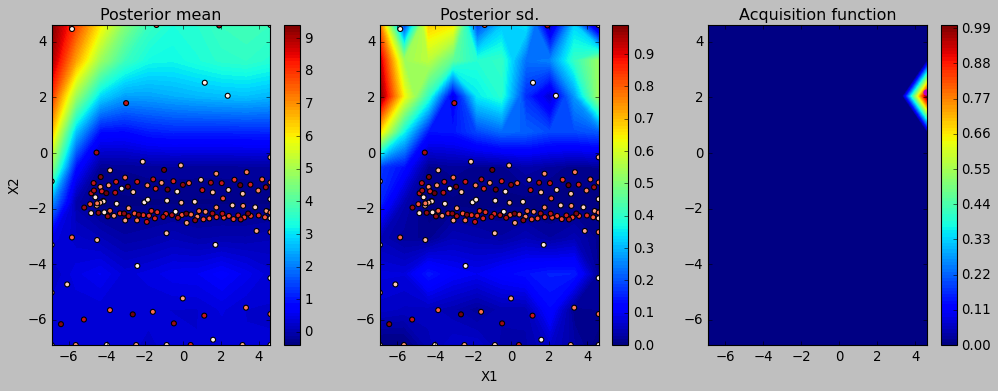

In [17]:
model.plot_acquisition()

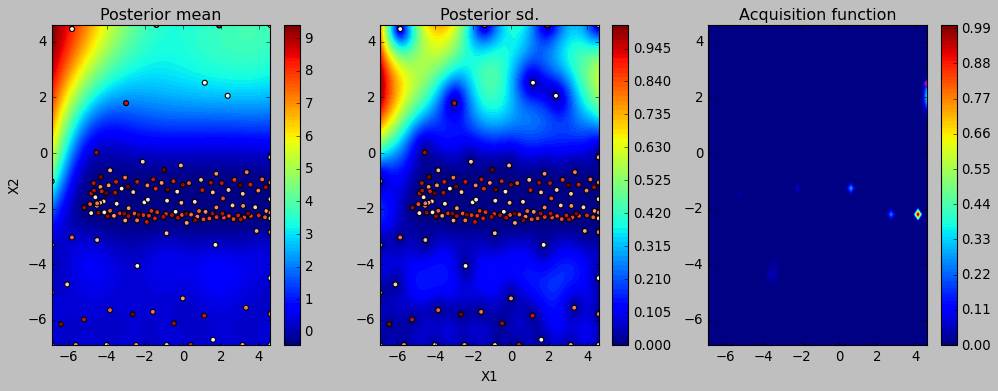

In [19]:
model.plot_acquisition()

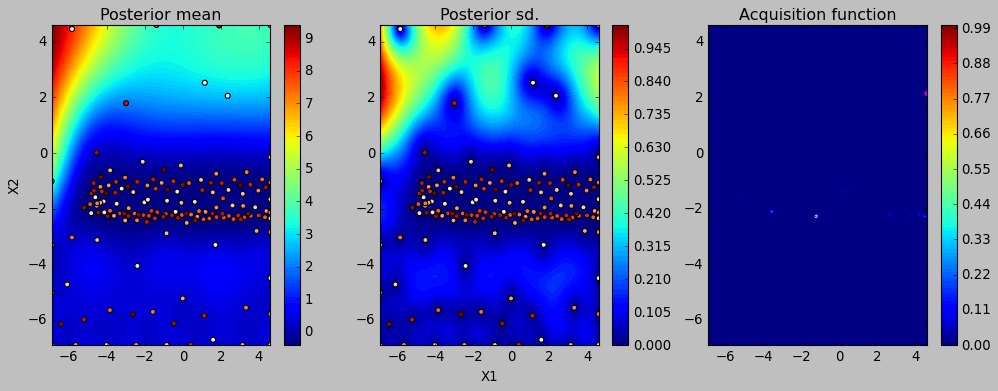

In [18]:
model.plot_acquisition()

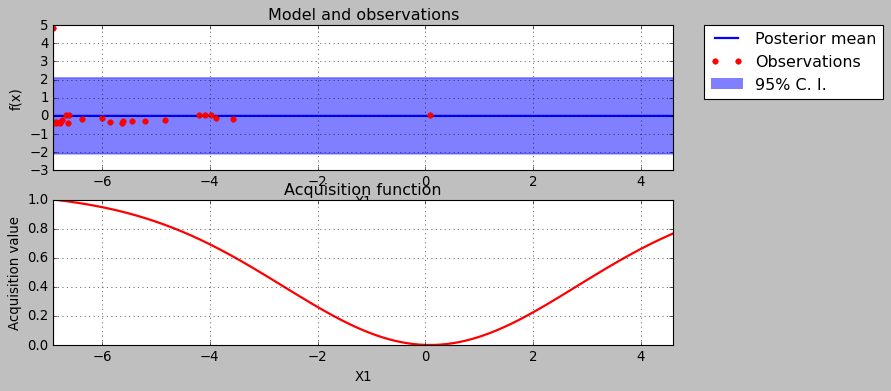

In [11]:
model.plot_acquisition(fixed_values=[None,-5.39385855,  -5.67969664, -31.34564144])